In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import matplotlib.pyplot as plt

# Exercise 7
# Capital Bikeshare data

In [4]:
url="https://raw.githubusercontent.com/davidzarruk/AdvancedMethodsDataAnalysisClass/main/datasets/bikeshare.csv"
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)
bikes.rename(columns={'count':'total'}, inplace=True)
bikes['hour'] = bikes.index.hour
bikes.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


# Exercise 7.1

In [5]:
bikes_workingday=bikes.groupby('workingday').total.mean()
bikes_workingday

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

 A priori no parece haber una diferencia significativa entre el total de las motos alquiladas en días hábiles ersus días no hábiles. Sin embargo para sacar conclusiones estadísticamente significativas tendríamos que correr una prueba de hipótesis.

In [6]:
bikes_hour=bikes.groupby('hour').total.mean()
bikes_hour

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

En este groupby se puede evidenciar que la hora del día si influye en la cantidad de motos alquiladas. Se puede ver que entre las 7 am y las 7 pm está la mayo congestión. Las 3 pm es la hora que hay más alquileres.

# Exercise 7.2

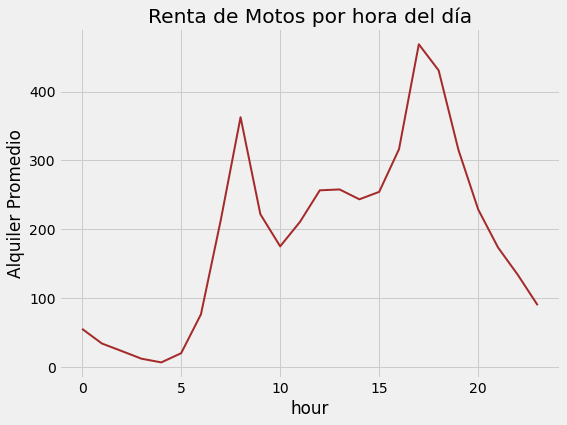

In [7]:
with plt.style.context('fivethirtyeight'):
    ax=bikes_hour.plot(figsize=(8,6), linewidth=2, color="brown", grid=True,
                    title="Renta de Motos por hora del día")
    ax.set_ylabel("Alquiler Promedio")

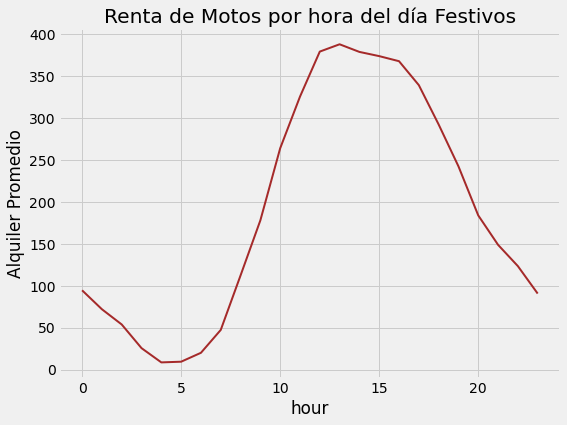

In [172]:
# hourly rental trend for "workingday=0"
df_holiday=bikes[bikes["workingday"]==0]
with plt.style.context('fivethirtyeight'):
    ax1=df_holiday.groupby('hour').total.mean().plot(figsize=(8,6), linewidth=2, color="brown", grid=True,
                    title="Renta de Motos por hora del día Festivos")
    ax1.set_ylabel("Alquiler Promedio")

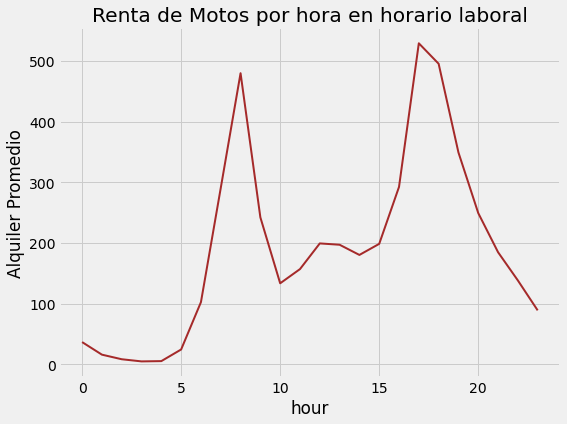

In [173]:
df_workday=bikes[bikes["workingday"]==1]
with plt.style.context('fivethirtyeight'):
    ax2=df_workday.groupby('hour').total.mean().plot(figsize=(8,6), linewidth=2, color="brown", grid=True,
                    title="Renta de Motos por hora en horario laboral")
    ax2.set_ylabel("Alquiler Promedio")

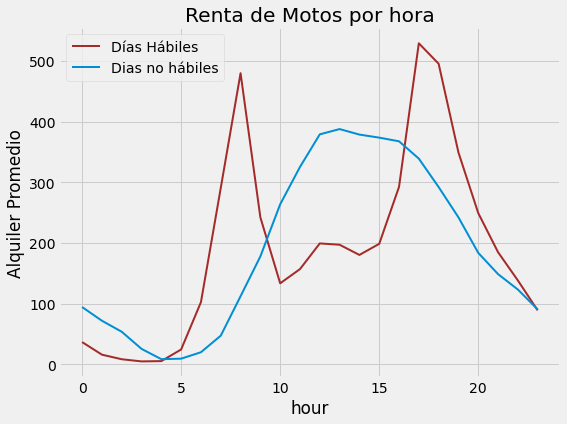

In [174]:
# combine the two plots
with plt.style.context('fivethirtyeight'):
    ax3=df_workday.groupby('hour').total.mean().plot(figsize=(8,6), linewidth=2, color="brown", grid=True,label="Días Hábiles",
                    title="Renta de Motos por hora", legend=True)
    ax3=df_holiday.groupby('hour').total.mean().plot(linewidth=2, label="Dias no hábiles", legend=True)
    ax3.set_ylabel("Alquiler Promedio")
    
    

Al filtrar entre día hábil y día no hábil podemos evidenciar una clara diferencia. En los días hábiles, como es intuitivo, la mayor demanda es entre las 6 y las 8 de la mañana y entre las 4 y las 6 pm. Estas horas coinciden con los horarios de entrada y salida más comunes de las oficinas, colegios y universidades. 

Por su parte, en los días no hábiles, la cantidad de alquileres es más constante y su mayor demanda se ubica cerca del medio día. Seguramente la gente quiere salir a almorzar en familia y toma el alquiler. 

# Exercise 7.3

In [8]:
import statsmodels.formula.api as smf
model=smf.ols("total~+workingday+hour", data=bikes).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     1041.
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:25:55   Log-Likelihood:                -71093.
No. Observations:               10886   AIC:                         1.422e+05
Df Residuals:                   10883   BIC:                         1.422e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     67.7060      3.866     17.514      0.0

Para este modelo de cuadrádos mínimos ordinarios, la variable hora si es estadísticamente significativa para explicar el comportamiento de la variable "total", mientras que la variable "workingday" no es significativa.

Dependiendo de los datos una regresión lineal puede tener algunas limitaciones. Por ejmplo si las relaciones entre las variables tienden a ser no lineales, un modelo de regresión no va a ser un buen predictor. Adicionalmente como se tiene una variable indicadora se debió haber creado una variable dummy para el análisis.

Un árbol de decisión no tiene este tipo de inconvenicnetes. Los modelos de árboles pueden capturar relaciones no lineales entre variables, no hay necesidad de crear variables dummys y además son muy fáciles de interpretar.

# Exercise 7.4

In [9]:
max_depth = None
num_pct = 10
max_features = None
X=bikes[["workingday","hour"]]
Y=bikes.total

# Función que calcula el MSE dado un split en la variable j

In [10]:

def MSE(X_col, y, split):
    "Calculate the MSE of an split k on feature j"
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    error_l=0
    error_r=0
    for i in range(n_l):
        error_l=error_l+(y_l[i]-y_l.mean())**2
    for i in range(n_r):
        error_r=error_l+(y_r[i]-y_r.mean())**2
    return (error_l)/n_l+(error_r)/n_r

# Función para hallar la variable y la partición que minimice el MSE 

In [11]:
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 999999999]  # j, split, mse
    
    # For all features
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # For all splits
        for split in splits:
            mse = MSE(X.iloc[:, j], y, split)
                        
            if mse < best_split[2]:
                best_split = [j, split, mse]
    
    return best_split

# Función que construye el árbol de decisión

In [12]:
def tree_grow(X, y, level=0, max_depth=2, num_pct=10):
    
       
    # Calculate the best split
    j, split, mse = best_split(X, y, num_pct)
    
    # save tree and estimate prediction
    y_pred = y.mean() 
    
    tree = dict(y_pred=y_pred, level=level, split=-1, n_samples=X.shape[0], mse=mse)
    
    # Check stooping criteria
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # No stooping criteria was meet, then continue to create the partition
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Next iteration to each split
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [14]:
tree=tree_grow(X, Y, level=0, max_depth=2, num_pct=100)
tree

{'y_pred': 191.57413191254824,
 'level': 0,
 'split': [1, 6.0],
 'n_samples': 10886,
 'mse': 1258.3194252492235,
 'sl': {'y_pred': 25.177719821162444,
  'level': 1,
  'split': [1, 1.0],
  'n_samples': 2684,
  'mse': 2286.128349021208,
  'sl': {'y_pred': 55.13846153846154,
   'level': 2,
   'split': -1,
   'n_samples': 455,
   'mse': 3240.9162995491233},
  'sr': {'y_pred': 19.061911170928667,
   'level': 2,
   'split': -1,
   'n_samples': 2229,
   'mse': 1458.1848555786564}},
 'sr': {'y_pred': 246.025237746891,
  'level': 1,
  'split': [1, 7.0],
  'n_samples': 8202,
  'mse': 3169.744854945368,
  'sl': {'y_pred': 76.25934065934067,
   'level': 2,
   'split': -1,
   'n_samples': 455,
   'mse': 483.86175063050257},
  'sr': {'y_pred': 255.9959984510133,
   'level': 2,
   'split': -1,
   'n_samples': 7747,
   'mse': 26873.26727020418}}}

# Función para predecir

In [15]:
def tree_predict(X, tree):
    
    predicted=np.zeros(X.shape[0])

    # Check if final node
    if tree['split'] == -1:
        predicted = tree['y_pred']
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # If left node is empty only continue with right
            predicted[~filter_l] = tree_predict(X_r, tree['sr'])
        elif X_r.shape[0] == 0:  # If right node is empty only continue with left
            predicted[filter_l] = tree_predict(X_l, tree['sl'])
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'])
            predicted[~filter_l] = tree_predict(X_r, tree['sr'])

    return predicted

# Evaluación de desempeño bajo la métrica MSE

In [16]:
predictions=tree_predict(X, tree)
MSE_A_PEDAL=0
for i in range(X.shape[0]):
    MSE_A_PEDAL=MSE_A_PEDAL+((predictions[[i]]-Y[i])**2)
MSE_A_PEDAL/X.shape[0]

array([22429.30057018])

## Exercise 7.5
## Construcción del árbol por Scikit-learn

In [17]:
# list of values to try for max_depth
max_depth_range = range(1, 11)

# list to store the average RMSE for each value of max_depth
accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

for depth in max_depth_range:
    clf = DecisionTreeRegressor(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, Y, cv=10, scoring="neg_mean_squared_error").mean())

Text(0, 0.5, 'Negative MSE')

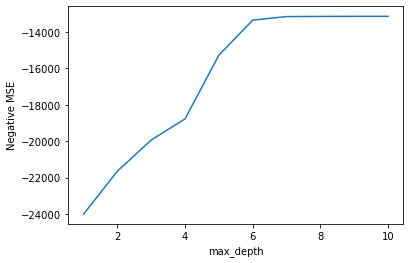

In [18]:
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Negative MSE')

In [19]:
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(-13143.121883295113, 10)

## Construcción del árbol de 3 niveles (6nodos) y evaluación de desempeño mediante la métrica MSE

In [21]:
clf = DecisionTreeRegressor(max_depth=2, random_state=1)
clf.fit(X, Y)
predi_sklearn=clf.predict(X)

In [22]:
MSE_SKLEARN=0
for i in range(X.shape[0]):
   MSE_SKLEARN=MSE_SKLEARN+((predi_sklearn[[i]]-Y[i])**2)/X.shape[0]
MSE_SKLEARN[0]

20133.764064018655

## Comparación de desempeño entre árbol manual y árbol de Scikit learn

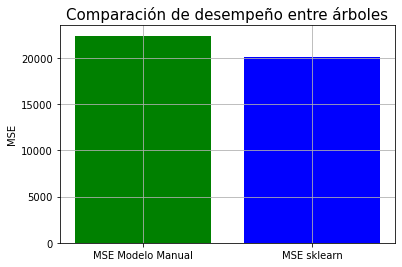

In [23]:
modelos=["MSE Modelo Manual", "MSE sklearn"]
mse_modelos=[22429.30,20133.764]
fig = plt.figure()
New_Colors = ['green','blue']
plt.bar(modelos,mse_modelos,color=New_Colors)
plt.title("Comparación de desempeño entre árboles", size=15)
plt.grid(True)
plt.ylabel("MSE")
plt.show()


Podemos ver que el desempeño del árbol de scikit learn es marginalmente mejor que el construido a mano. Una de las explicaciones es que el algoritmo de scikit learn no hace solo 10 particiones en los deciles de los datos de X como nosotros, ensaya sobre muchas partiicones más, permitiendole así mayor flexibilidad en la construcción y mejor ajuste a los datos.